In [2]:
import numpy as np 
import pandas as pd 
import sys
import time

C:\Users\mariu\AppData\Local\Temp\ipykernel_151608\1090908979.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
review = pd.read_json("./data/review/review_ea", lines=True)

review.head()



,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,mb1F4jkmWzioTIXHFMmDQQ,xYlnzfQNOYpYga8vWIpnJw,e1WJ1qcgF2TBkoYzopeTgQ,5,0,0,0,Long waits typical for the small dive of a din...,2017-03-20 13:10:58
1,YpCUaIZOHL49g7aFFo8rnw,5flmantyW8kZdmPXNfiX9A,1Bu2qyqv4quJ9YvABY76PA,5,1,0,0,If you ask my friends how many times they've e...,2013-01-15 21:50:50
2,Ue2fecGoQyGc61x0nQx2Rw,HINlw23_50C3gmOEPlRmjA,DY4jLULHKBrjfKeO_H1Qgw,4,0,0,1,This hole in the wall has some of the best piz...,2015-12-30 19:58:11
3,QStibHGxYuSXv0KiWciUCw,vL4NVHcolckP-ETkAypPxw,cfTlwXhjfls-nWqLGfrbog,5,3,0,1,This is a GREAT thrift store. There are lots o...,2009-04-11 07:29:19
4,MVRlmv0d8OFZ22y2O81bXA,JVhTxsNFTXbLbMXUCbf-VQ,pWy12daEVhWnYBoQUblV2Q,5,0,0,0,Easily the best dog park in the area. There a...,2015-04-21 16:44:37


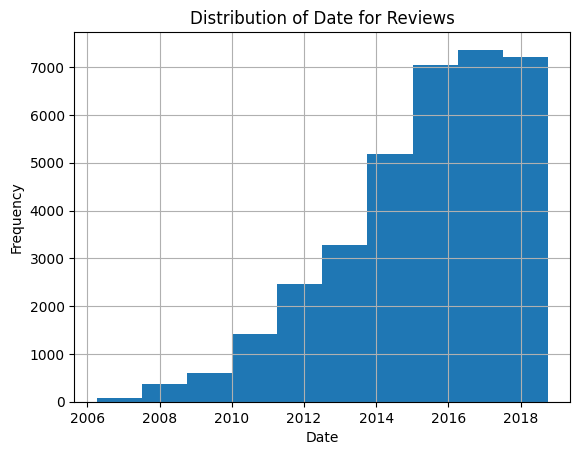

In [4]:
import matplotlib.pyplot as plt

review['date'].hist()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date for Reviews')
plt.show()


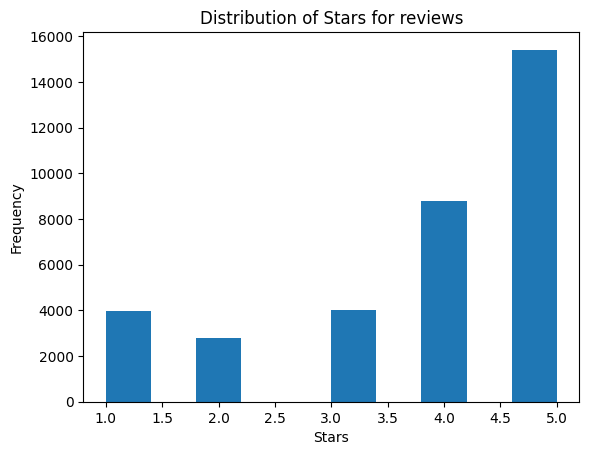

In [5]:
plt.hist(review['stars'])
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars for reviews')
plt.show()

In [6]:
user = pd.read_json("./data/user/user_ao", lines=True)

user.head()



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,_wu3ZQFuGwGKLB-P6baT3w,Cathy,1,2016-06-21 01:43:31,0,0,0,,"LugbIX6Id2hkVs3oA7I42Q, hkoNKJJmSahO5E9EkB8KTw...",0,...,0,0,0,0,0,0,0,0,0,0
1,LTMNEpVIJkEfM8ma0DEYyg,Kevin,35,2011-10-17 02:23:10,44,3,14,,"i-PdbQ48BBi-pcTNc8J0JA, P43L-JWDQAiKm0TCVvPR-w...",2,...,1,0,0,0,0,1,1,1,2,0
2,SULDhr81oHun95dKmpoVIQ,Maura,17,2014-08-26 22:33:27,27,3,2,,"iC9PKjB9UBnTemMcXeZpfg, EnljPrj4D6In0UoiEfN3jg...",0,...,0,0,0,0,0,0,0,0,0,0
3,ToKwsoQceCVCH1ECKP26bw,Chelsea,9,2013-05-13 19:10:48,3,0,0,,"lvbVIgb6g6SrXmrInTbySA, cQ69l9GUofa17rcsKEOStQ...",0,...,0,0,0,0,0,0,0,0,0,0
4,ZzhThUUZg5_rwZkzimHOrg,Lance,87,2015-11-18 14:54:18,100,22,16,"2018,2019","b-3gA-vGKPEDL0N0hBot1g, QIWUKhFuSv67hPAU9Op5zw...",0,...,0,0,0,0,1,5,1,1,1,0


In [7]:
num_rows = user.shape[0]
print(num_rows)


20000


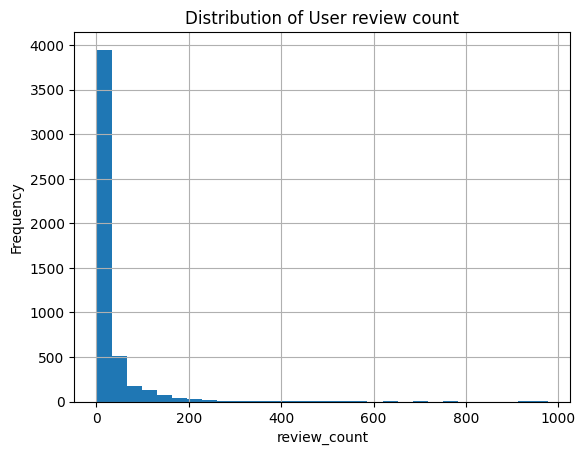

In [11]:
#select only 1000 values and plot the review_count

user[0:4999]['review_count'].hist(bins=30)
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Distribution of User review count')
plt.show()




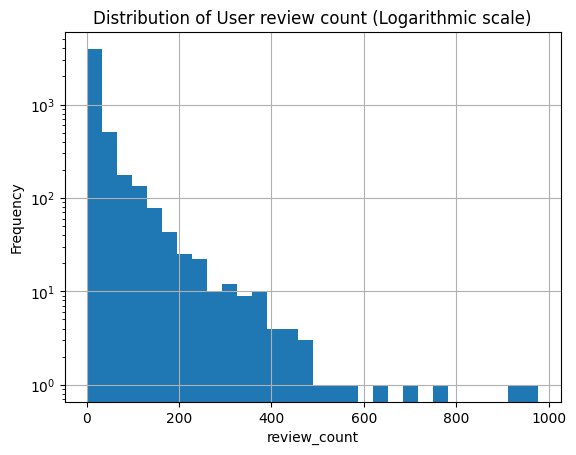

In [12]:
user[0:4999]['review_count'].hist(bins=30)
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Distribution of User review count (Logarithmic scale)')
plt.yscale('log')
plt.show()


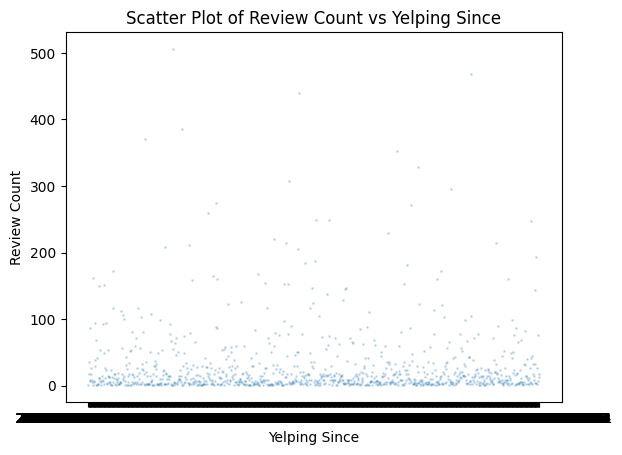

In [18]:
plt.scatter(user[0:999]['yelping_since'], user[0:999]['review_count'], alpha=0.2, s=1)
plt.xlabel('Yelping Since')
plt.ylabel('Review Count')
plt.title('Scatter Plot of Review Count vs Yelping Since')
plt.show()


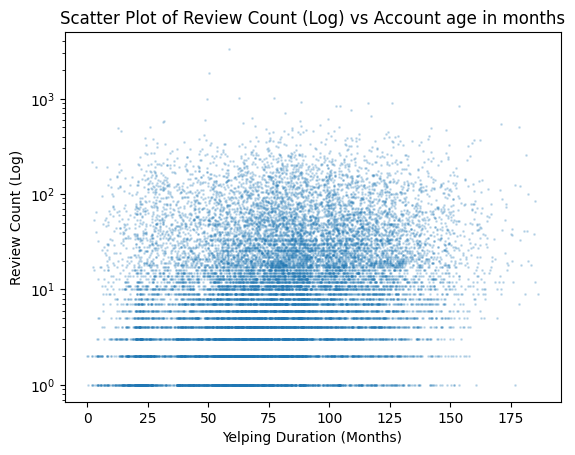

In [23]:

# Calculate the most recent date
most_recent_date = user['yelping_since'].max()

# Calculate the duration in months
user['yelping_duration_months'] = (most_recent_date - user['yelping_since']) / pd.Timedelta(days=30)

# Sort the dataframe by the most recent "yelping_since" date
user = user.sort_values(by='yelping_since', ascending=False)



# Convert "yelping_since" column to datetime
user['yelping_since'] = pd.to_datetime(user['yelping_since'])

# Calculate the most recent date
most_recent_date = user['yelping_since'].max()

# Calculate the duration in months
user['yelping_duration_months'] = (most_recent_date - user['yelping_since']) / pd.Timedelta(days=30)

# Sort the dataframe by the most recent "yelping_since" date
user = user.sort_values(by='yelping_since', ascending=False)

# Plot the scatter plot with logarithmic review_count
plt.scatter(user['yelping_duration_months'], user['review_count'], alpha=0.2, s=1)
plt.xlabel('Yelping Duration (Months)')
plt.ylabel('Review Count (Log)')
plt.title('Scatter Plot of Review Count (Log) vs Account age in months')
plt.yscale('log')  # Make review_count logarithmic
plt.show()




In [32]:
# Assuming df is your DataFrame
non_none_friends = user[user['friends'] != 'None']['friends'].values[0]
print(non_none_friends)

g2WfjBjEsHe4ASlNBhFDPg, CtF9WRw7g6_uXmxShP8RXw, fCiyP1T_s2fT5tVbqMhhnw, 9R2-H0cRetTMWCs4i3p2GA, eyEvyqo55T0vvoE8hOA1hw, LfrdIj_1OUOWI28bz4dJew, SM5bSHaLJlYClwf-Xr5WLg, cyI1ZORTJqG1i_3XjdpCLg, IEd3Tuzkc8Szqh3BwhLjjg, nR6aGpevxfD0YbQhsDZtmw, F3U_e3A-vozTXq8casUd2w, z8JBksBFZYOdjxi3PbsZBg, gV8M56h3EmiKz-wClg_P-w, ifymoq3XPEAtdvKILAtYWg, uPWvib9JwTNlGUTfASXgSg, _q46qxllGwJjJ8kHn2IuLw, bR0_9cRZ-AB2tO6DCDj9Ig, 95bV0n_jDK_ERo70kGqazg, JIF9Yfhp3e2L9yOk5-1uvA, VFBMkLVZaDNsgyJLQo8f3Q, GWqaHAd82gAoNP0VJ00veQ, -4-aMsDygWxOZTOlbqdnMQ, RrbqWmHWjVUSapbqGjsP8Q, 0bYby6JyEWmy7pWMG0SWTg, qVg2fag0RMb26OpFxK6t_Q


<Figure size 1200x800 with 0 Axes>

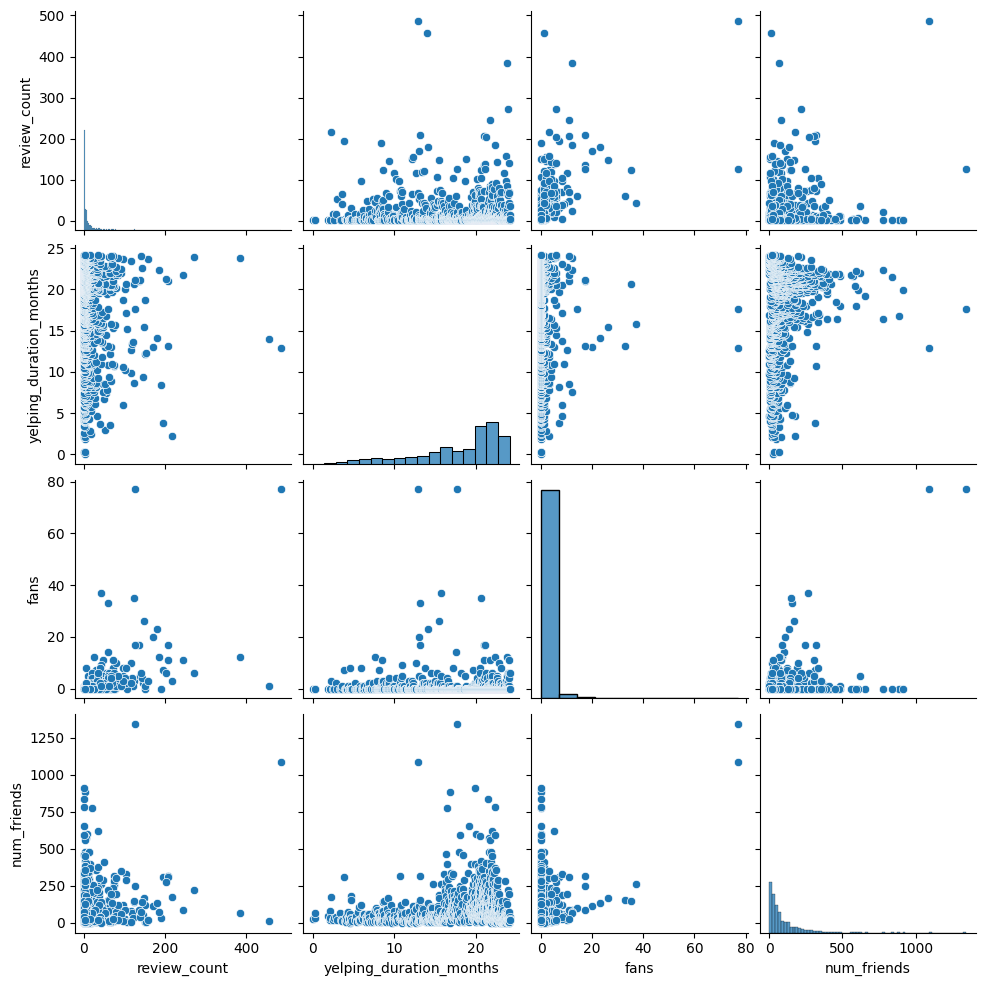

In [43]:

selected_columns = user[['review_count', 'yelping_duration_months', 'friends', 'fans', 'num_friends']]

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches

sns.pairplot(selected_columns.iloc[:1000])

plt.show()




